In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install pypsa[gurobi] "xarray>=2023.8.0" 

zsh:1: no matches found: pypsa[gurobi]
Note: you may need to restart the kernel to use updated packages.


In [3]:
from add_country import *

/Users/marcoul/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
import pypsa
import pandas as pd
from dataclasses import dataclass

In [5]:
add_scandinavia(network, climatic_year, time_horizon_in_hours)

In [6]:
add_germany(network, climatic_year, time_horizon_in_hours)

In [7]:
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
scandinaviaFossils,Scandinavia,PQ,,5000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaBioEnergies,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaHydroelectric,Scandinavia,PQ,,57000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaWind_on_shore,Scandinavia,PQ,,43000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaWind_off_shore,Scandinavia,PQ,,17000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaNuclear,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,24,24,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaSolar,Scandinavia,PQ,,19000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaFailure,Scandinavia,PQ,,100000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
germanyFossils,Germany,PQ,,5000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0


In [8]:
network

PyPSA Network
Components:
 - Bus: 2
 - Generator: 16
 - Load: 4
 - Store: 8
Snapshots: 8760

In [9]:
links_list = [
    {"name" : "Link_SCA_Curtailment", "bus0" : "Scandinavia", "bus1" : "Curtailment", "p_nom" : 700000, "efficiency" : 0.95},
    {"name" : "Link_SCA_Germany", "bus0":"Scandinavia", "bus1":"Germany", "p_nom":7415, "efficiency":0.95},
    {"name" : "Link_SCA_Poland", "bus0":"Scandinavia", "bus1":"Poland", "p_nom":600, "efficiency":0.95},
    #{"name" : "Link_SCA_Benelux", "bus0":"Scandinavia", "bus1":"Benelux", "p_nom":1400, "efficiency":0.95},
    #{"name" : "Link_Benelux_SCA", "bus0":"Benelux", "bus1":"Scandinavia", "p_nom":1400, "efficiency":0.95},
    {"name" : "Link_Poland_SCA", "bus0":"Poland", "bus1":"Scandinavia", "p_nom":0, "efficiency":0.95},
    {"name" : "Link_Germany_SCA", "bus0":"Germany", "bus1":"Scandinavia", "p_nom":2000, "efficiency":0.95},
    {"name" : "Link_France_Germany", "bus0":"France", "bus1":"Germany", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_France", "bus0":"Germany", "bus1":"France", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_Poland", "bus0":"Germany", "bus1":"Poland", "p_nom":3400, "efficiency":0.95},
    {"name" : "Link_Poland_Germany", "bus0":"Poland", "bus1":"Germany", "p_nom":3400, "efficiency":0.95},
    #{"name" : "Link_Germany_Benelux", "bus0":"Germany", "bus1":"Benelux", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_Germany", "bus0":"Benelux", "bus1":"Germany", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_France", "bus0":"Benelux", "bus1":"France", "p_nom":4680, "efficiency":0.95},
    #{"name" : "Link_France_Benelux", "bus0":"France", "bus1":"Benelux", "p_nom":4680, "efficiency":0.95},
    {"name" : "Link_France_Iberian", "bus0":"France", "bus1":"Iberian", "p_nom":5000, "efficiency":0.95},
    {"name" : "Link_Iberian_France", "bus0":"Iberian", "bus1":"France", "p_nom":5000, "efficiency":0.95},
]

for links in links_list:
    network.add("Link", **links,)

'''network.plot(
    title="European Electricity Network",
    color_geomap=True,
    jitter=0.3,
)'''

In [10]:
result = network.optimize(solver_name="gurobi")
print(result)   

Index(['Link_Poland_SCA', 'Link_France_Germany', 'Link_Poland_Germany',
       'Link_France_Iberian', 'Link_Iberian_France'],
      dtype='object', name='Link')
Index(['Link_SCA_Curtailment', 'Link_SCA_Poland', 'Link_Germany_France',
       'Link_Germany_Poland', 'Link_France_Iberian', 'Link_Iberian_France'],
      dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'germanyCurtailment-load'], dtype='object', name='Load')
Index(['Link_Poland_SCA', 'Link_France_Germany', 'Link_Poland_Germany',
       'Link_France_Iberian', 'Link_Iberian_France'],
      dtype='object', name='Link')
Index(['Link_SCA_Curtailment', 'Link_SCA_Poland', 'Link_Germany_France',
       'Link_Germany_Poland', 'Link_France_Iberian', 'Link_Iberian_France'],
      dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'germanyCurtailment-load'], dtype='object', name='Load')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-21


Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


Read LP format model from file /private/var/folders/9r/0dm0pnsj7hz060lltl_d45_h0000gn/T/linopy-problem-z4duvhcn.lp
Reading time = 4.04 seconds
obj: 1051226 rows, 639480 columns, 2898434 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1051226 rows, 639480 columns and 2898434 nonzeros
Model fingerprint: 0x6ffde91a
Variable types: 376680 continuous, 262800 integer (262800 binary)
Coefficient statistics:
  Matrix range     [9e-01, 1e+05]
  Objective range  [5e+00, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 964786 rows and 559718 columns (presolve time = 5s) ...
Presolve removed 975602 rows and 576626 columns (presolve time = 10s) ...
Presolve removed 975602 rows and 639476 columns (presolve time = 26s) ...
Presolve removed 1051224 rows and 639476 columns
Presolve time

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 639480 primals, 0 duals
Objective: 7.05e+10
Solver model: available
Solver message: 2



('ok', 'optimal')


<Axes: xlabel='Generator', ylabel='GW'>

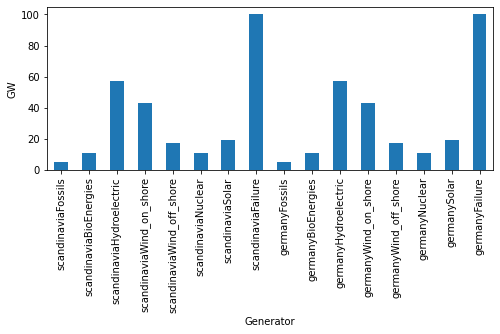

In [11]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))

<Axes: xlabel='snapshot', ylabel='GW'>

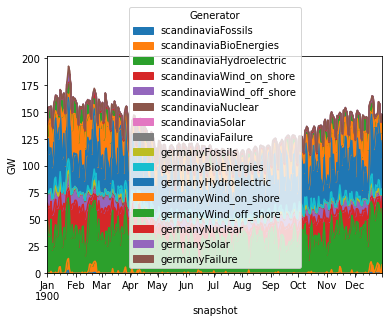

In [12]:
network.generators_t.p['scandinaviaFailure'] = network.generators_t.p['scandinaviaFailure'].clip(lower=0)
network.generators_t.p['germanyFailure'] = network.generators_t.p['germanyFailure'].clip(lower=0)

network.generators_t.p.resample('D').mean().div(1e3).plot.area(subplots=False, ylabel="GW")

In [1]:
network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(10,10), subplots=True, ylabel="GW")

NameError: name 'network' is not defined